In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
model_path="drive//MyDrive//Colab Notebooks//trained_model.h5" # trained model
pic_path="drive//MyDrive//Colab Notebooks//happyFace.jpg"
pic_path="drive//MyDrive//Colab Notebooks//fearFace.jpg"


In [4]:
new_model=tf.keras.models.load_model(model_path)

In [29]:
pic=cv2.imread(pic_path)

In [6]:
pic.shape

(1023, 991, 3)

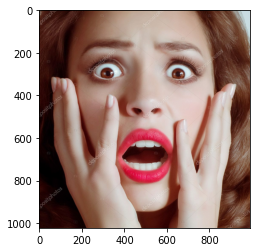

In [23]:
plt.imshow(cv2.cvtColor(pic,cv2.COLOR_BGR2RGB))

In [24]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [25]:
gray=cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
gray.shape

(1023, 991)

In [26]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
print(type(faces))

<class 'numpy.ndarray'>


In [27]:
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = pic[y:y+h, x:x+w]
    cv2.rectangle(pic, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
      print("Face not detected")
    else:
      for (ex,ey,ew,eh) in facess:
        face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face


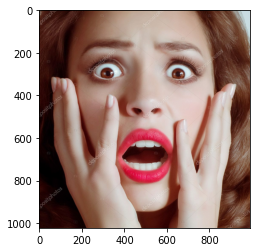

In [30]:
plt.imshow(cv2.cvtColor(pic,cv2.COLOR_BGR2RGB))

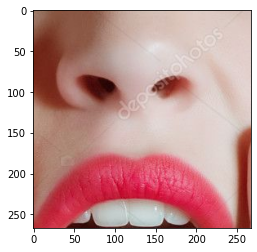

In [13]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))


In [14]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
final_image = final_image/255.0

In [15]:
Predictions = new_model.predict(final_image)

In [16]:
Predictions[0]

array([9.0308475e-01, 5.5119708e-05, 4.2511374e-02, 5.2250240e-02,
       4.1607989e-04, 2.1429050e-04, 1.4681336e-03], dtype=float32)

In [17]:
emotion = np.argmax(Predictions)
emotions=['Angry','Disgust','Fear','Happy','Neutral','Sed','Surprise']
print(emotions[emotion])

Angry
